## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 40us/step - loss: 2.2749 - accuracy: 0.1598 - val_loss: 2.2199 - val_accuracy: 0.2004
Epoch 2/500
50000/50000 [==============================] - 2s 33us/step - loss: 2.1892 - accuracy: 0.2220 - val_loss: 2.1608 - val_accuracy: 0.2359
Epoch 3/500
50000/50000 [==============================] - 2s 34us/step - loss: 2.1370 - accuracy: 0.2512 - val_loss: 2.1141 - val_accuracy: 0.2654
Epoch 4/500
50000/50000 [==============================] - 2s 34us/step - loss: 2.0948 - accuracy: 0.2716 - val_loss: 2.0759 - val_accuracy: 0.2786
Epoch 5/500
50000/50000 [==============================] - 2s 32us/step - loss: 2.0594 - accuracy: 0.2819 - val_loss: 2.0435 - val_accuracy: 0.2885
Epoch 6/500
50000/50000 [==============================] - 2s 33us/step - loss: 2.0291 - accuracy: 0.2931 - val_loss: 2.0149 - val_accuracy: 0.3005
Epoch 7/500
50000/50000 [==============================] - 2s

50000/50000 [==============================] - 2s 32us/step - loss: 1.6789 - accuracy: 0.4143 - val_loss: 1.6850 - val_accuracy: 0.4141
Epoch 55/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.6758 - accuracy: 0.4152 - val_loss: 1.6789 - val_accuracy: 0.4166
Epoch 56/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.6729 - accuracy: 0.4171 - val_loss: 1.6764 - val_accuracy: 0.4170
Epoch 57/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.6696 - accuracy: 0.4188 - val_loss: 1.6738 - val_accuracy: 0.4140
Epoch 58/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.6671 - accuracy: 0.4198 - val_loss: 1.6707 - val_accuracy: 0.4210
Epoch 59/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.6641 - accuracy: 0.4198 - val_loss: 1.6670 - val_accuracy: 0.4194
Epoch 60/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.6610 - accuracy: 0.4207 - val_loss: 

50000/50000 [==============================] - 2s 32us/step - loss: 1.5399 - accuracy: 0.4644 - val_loss: 1.5637 - val_accuracy: 0.4519
Epoch 110/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.5381 - accuracy: 0.4657 - val_loss: 1.5575 - val_accuracy: 0.4536
Epoch 111/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.5358 - accuracy: 0.4655 - val_loss: 1.5565 - val_accuracy: 0.4536
Epoch 112/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.5337 - accuracy: 0.4665 - val_loss: 1.5599 - val_accuracy: 0.4511
Epoch 113/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.5321 - accuracy: 0.4673 - val_loss: 1.5525 - val_accuracy: 0.4569
Epoch 114/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.5297 - accuracy: 0.4675 - val_loss: 1.5503 - val_accuracy: 0.4556
Epoch 115/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.5276 - accuracy: 0.4687 - val_

Epoch 164/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.4410 - accuracy: 0.4981 - val_loss: 1.4864 - val_accuracy: 0.4737
Epoch 165/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.4394 - accuracy: 0.4992 - val_loss: 1.4848 - val_accuracy: 0.4741
Epoch 166/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.4377 - accuracy: 0.4982 - val_loss: 1.4850 - val_accuracy: 0.4730
Epoch 167/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.4364 - accuracy: 0.5005 - val_loss: 1.4830 - val_accuracy: 0.4736
Epoch 168/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.4345 - accuracy: 0.4990 - val_loss: 1.4927 - val_accuracy: 0.4743
Epoch 169/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.4329 - accuracy: 0.5008 - val_loss: 1.4839 - val_accuracy: 0.4714
Epoch 170/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.4311 - accuracy:

50000/50000 [==============================] - 2s 32us/step - loss: 1.3616 - accuracy: 0.5239 - val_loss: 1.4379 - val_accuracy: 0.4892
Epoch 219/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.3603 - accuracy: 0.5250 - val_loss: 1.4454 - val_accuracy: 0.4853
Epoch 220/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.3589 - accuracy: 0.5246 - val_loss: 1.4302 - val_accuracy: 0.4900
Epoch 221/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.3573 - accuracy: 0.5261 - val_loss: 1.4307 - val_accuracy: 0.4898
Epoch 222/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.3562 - accuracy: 0.5257 - val_loss: 1.4342 - val_accuracy: 0.4884
Epoch 223/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.3547 - accuracy: 0.5268 - val_loss: 1.4323 - val_accuracy: 0.4882
Epoch 224/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.3541 - accuracy: 0.5271 - val_

Epoch 273/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.2915 - accuracy: 0.5488 - val_loss: 1.3965 - val_accuracy: 0.5036
Epoch 274/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.2894 - accuracy: 0.5503 - val_loss: 1.4044 - val_accuracy: 0.5002
Epoch 275/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.2885 - accuracy: 0.5499 - val_loss: 1.4134 - val_accuracy: 0.4975
Epoch 276/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.2871 - accuracy: 0.5498 - val_loss: 1.4044 - val_accuracy: 0.4981
Epoch 277/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.2867 - accuracy: 0.5497 - val_loss: 1.4228 - val_accuracy: 0.4969
Epoch 278/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.2851 - accuracy: 0.5516 - val_loss: 1.3962 - val_accuracy: 0.5016
Epoch 279/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.2836 - accuracy:

50000/50000 [==============================] - 2s 31us/step - loss: 1.2280 - accuracy: 0.5707 - val_loss: 1.3690 - val_accuracy: 0.5101
Epoch 328/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.2261 - accuracy: 0.5711 - val_loss: 1.3766 - val_accuracy: 0.5056
Epoch 329/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.2245 - accuracy: 0.5726 - val_loss: 1.3813 - val_accuracy: 0.5079
Epoch 330/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.2250 - accuracy: 0.5714 - val_loss: 1.3968 - val_accuracy: 0.5031
Epoch 331/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.2229 - accuracy: 0.5739 - val_loss: 1.3782 - val_accuracy: 0.5078
Epoch 332/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.2218 - accuracy: 0.5726 - val_loss: 1.4063 - val_accuracy: 0.5038
Epoch 333/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.2207 - accuracy: 0.5726 - val_

Epoch 382/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.1672 - accuracy: 0.5948 - val_loss: 1.3681 - val_accuracy: 0.5106
Epoch 383/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.1652 - accuracy: 0.5942 - val_loss: 1.3749 - val_accuracy: 0.5125
Epoch 384/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.1661 - accuracy: 0.5935 - val_loss: 1.3638 - val_accuracy: 0.5140
Epoch 385/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.1634 - accuracy: 0.5942 - val_loss: 1.3596 - val_accuracy: 0.5158
Epoch 386/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.1633 - accuracy: 0.5939 - val_loss: 1.3517 - val_accuracy: 0.5196
Epoch 387/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.1614 - accuracy: 0.5945 - val_loss: 1.3579 - val_accuracy: 0.5200
Epoch 388/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.1600 - accuracy:

50000/50000 [==============================] - 2s 32us/step - loss: 1.1102 - accuracy: 0.6114 - val_loss: 1.3409 - val_accuracy: 0.5274
Epoch 437/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.1092 - accuracy: 0.6145 - val_loss: 1.3417 - val_accuracy: 0.5228
Epoch 438/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.1079 - accuracy: 0.6145 - val_loss: 1.3556 - val_accuracy: 0.5155
Epoch 439/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.1064 - accuracy: 0.6148 - val_loss: 1.3648 - val_accuracy: 0.5148
Epoch 440/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.1050 - accuracy: 0.6154 - val_loss: 1.3386 - val_accuracy: 0.5267
Epoch 441/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.1047 - accuracy: 0.6154 - val_loss: 1.3362 - val_accuracy: 0.5215
Epoch 442/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.1037 - accuracy: 0.6171 - val_

Epoch 491/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.0521 - accuracy: 0.6339 - val_loss: 1.3434 - val_accuracy: 0.5218
Epoch 492/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.0510 - accuracy: 0.6363 - val_loss: 1.3897 - val_accuracy: 0.5131
Epoch 493/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.0518 - accuracy: 0.6345 - val_loss: 1.3418 - val_accuracy: 0.5220
Epoch 494/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.0489 - accuracy: 0.6362 - val_loss: 1.3674 - val_accuracy: 0.5187
Epoch 495/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.0491 - accuracy: 0.6351 - val_loss: 1.3385 - val_accuracy: 0.5258
Epoch 496/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.0493 - accuracy: 0.6349 - val_loss: 1.3825 - val_accuracy: 0.5167
Epoch 497/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.0471 - accuracy:

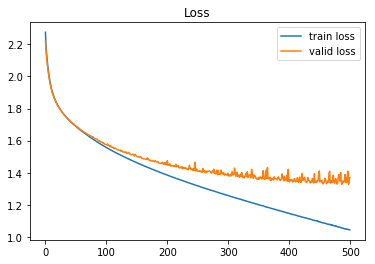

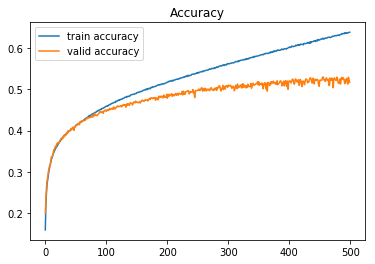

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()